Maayan Maor 206825473
Bar Persi 206910234

In [134]:
#Q2
import pandas as pd
df = pd.read_csv('spam_ham_dataset.csv')

In [135]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
df["tokenized"] = df["text"].apply(word_tokenize)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\maaya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [136]:
df.head()

,Unnamed: 0,label,text,label_num,tokenized
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0,"[Subject, :, enron, methanol, ;, meter, #, :, ..."
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,"[Subject, :, hpl, nom, for, january, 9, ,, 200..."
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,"[Subject, :, neon, retreat, ho, ho, ho, ,, we,..."
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,"[Subject, :, photoshop, ,, windows, ,, office,..."
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,"[Subject, :, re, :, indian, springs, this, dea..."


In [137]:
#Q3
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(style="seaborn")

In [138]:
#Compare the amount between spam and ham email.
df.label_num.value_counts()

0    3672
1    1499
Name: label_num, dtype: int64

In [139]:
#Checking the amount of the words for each mail.
df["words_count"] = df.text.str.split().map(lambda x: len(x))


In [140]:
#Func that create histogram.
def func(feature):
    x = df[df.label_num == 0][feature]
    y = df[df.label_num == 1][feature]

    _ = plt.hist(x, color="black", bins=100)
    _ = plt.hist(y, color="pink", bins=100)
    return _

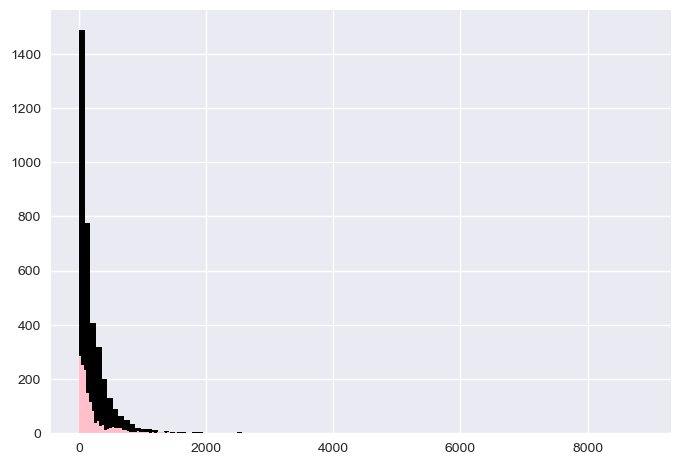

In [141]:
new_hist = func("words_count")

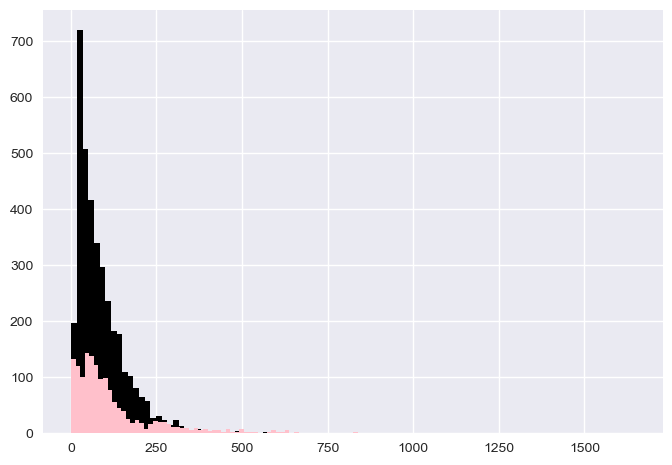

In [142]:
#Check the amount of unique words for each mail in the data.
df["unique_word_count"] = df.text.map(lambda x: len(set(str(x).split())))
new_hist = func("unique_word_count")

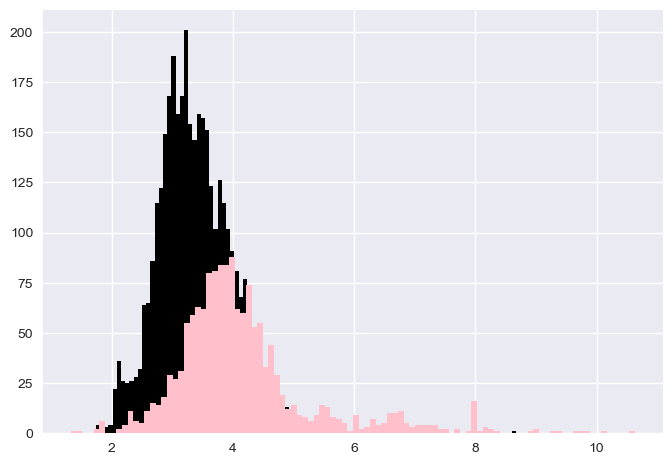

In [143]:
#Check the mean word length for each mail in the data.
df['mean_word_length'] = df.text.map(
    lambda x: np.mean([len(w) for w in str(x).split()])
)
new_hist = func("mean_word_length")

In [144]:
#Q4
from sklearn.model_selection import train_test_split
train,test = train_test_split(df, test_size=0.2, random_state=123)

In [145]:
x_train = train["text"]
y_train = train["label_num"]
x_test = test["text"]
y_test = test["label_num"]

In [146]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [147]:
vectorizer = TfidfVectorizer(stop_words="english")

In [148]:
tfidf_x_train = vectorizer.fit_transform(x_train)
tfidf_x_test = vectorizer.transform(x_test)

In [149]:
feature_names = vectorizer.get_feature_names_out()

In [150]:
#Q5
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=5, max_iter=1000)

In [151]:
classifier.fit(tfidf_x_train,y_train)
test_prediction = classifier.predict(tfidf_x_test)

In [152]:
#Q6
from sklearn import metrics

In [153]:
accuracy_logistic = metrics.accuracy_score(y_test,test_prediction)
print(accuracy_logistic)

0.9864734299516909


In [154]:
recall_logistic= metrics.recall_score(y_test,test_prediction)
print(recall_logistic)

0.9756944444444444


In [155]:
precision_logistic = metrics.precision_score(y_test,test_prediction)
print(precision_logistic)

0.9756944444444444


In [156]:
f1_score_logistic = metrics.f1_score(y_test,test_prediction)
print(f1_score_logistic)

0.9756944444444444


In [157]:
#Q7
from sklearn.tree import DecisionTreeClassifier

In [158]:
classifier_DecisionTree = DecisionTreeClassifier(random_state=2)

In [159]:
classifier_DecisionTree.fit(tfidf_x_train,y_train)

DecisionTreeClassifier(random_state=2)

In [160]:
test_predict_DecisionTree = classifier_DecisionTree.predict(tfidf_x_test)

In [161]:
accuracy_DecisionTree = metrics.accuracy_score(y_test, test_predict_DecisionTree)
print("accuracy:", accuracy_DecisionTree)
recall_DecisionTree = metrics.recall_score(y_test, test_predict_DecisionTree)
print("recall:", recall_DecisionTree)
precision_DecisionTree = metrics.precision_score(y_test, test_predict_DecisionTree)
print("precision:", precision_DecisionTree)
f1_score_DecisionTree = metrics.f1_score(y_test, test_predict_DecisionTree)
print("f1_score:", f1_score_DecisionTree)

accuracy: 0.9526570048309179
recall: 0.9166666666666666
precision: 0.9134948096885813
f1_score: 0.9150779896013864


In [162]:
#linear regression
from sklearn.linear_model import LinearRegression
linear_classifier = LinearRegression()

In [163]:
linear_classifier.fit(tfidf_x_train,y_train)

LinearRegression()

In [164]:
test_prediction_linear = linear_classifier.predict(tfidf_x_test)

In [165]:
test_prediction_linear[test_prediction_linear > 0.5] = 1
test_prediction_linear[test_prediction_linear <= 0.5] = 0
accuracy_linear = metrics.accuracy_score(y_test, test_prediction_linear)
print("accuracy:", accuracy_linear)
recall_linear = metrics.recall_score(y_test, test_prediction_linear)
print("recall:", recall_linear)
precision_linear = metrics.precision_score(y_test, test_prediction_linear)
print("precision:", precision_linear)
f1_score_linear = metrics.f1_score(y_test, test_prediction_linear)
print("f1_score:", f1_score_linear)

accuracy: 0.9565217391304348
recall: 0.8680555555555556
precision: 0.9727626459143969
f1_score: 0.9174311926605505


In [166]:
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier(n_neighbors=7)

In [167]:
KNN_classifier.fit(tfidf_x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [168]:
test_prediction_KNN = KNN_classifier.predict(tfidf_x_test)

c:\Users\maaya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [169]:
accuracy_knn = metrics.accuracy_score(y_test, test_prediction_KNN)
print("accuracy:", accuracy_knn)
recall_knn = metrics.recall_score(y_test, test_prediction_KNN)
print("recall:", recall_knn)
precision_knn = metrics.precision_score(y_test, test_prediction_KNN)
print("precision:", precision_knn)
f1_score_knn = metrics.f1_score(y_test, test_prediction_KNN)
print("f1_score:", f1_score_knn)

accuracy: 0.9584541062801932
recall: 0.8715277777777778
precision: 0.9766536964980544
f1_score: 0.9211009174311926


In [170]:
#Q8
matrix_scores = [[accuracy_logistic,recall_logistic,precision_logistic,f1_score_logistic],
 [accuracy_DecisionTree,recall_DecisionTree,precision_DecisionTree,f1_score_DecisionTree],
 [accuracy_linear,recall_linear,precision_linear,f1_score_linear],
 [accuracy_knn,recall_knn,precision_knn,f1_score_knn]]

In [171]:
df_scores = pd.DataFrame(matrix_scores,
                         index=['Logistic Regression', 'Linear regression', 'Decision TRee', 'knn'],
                         columns=['accuracy','recall','precision','f1-score'])
print("Scores dataframe:")
print(df_scores)

Scores dataframe:
                     accuracy    recall  precision  f1-score
Logistic Regression  0.986473  0.975694   0.975694  0.975694
Linear regression    0.952657  0.916667   0.913495  0.915078
Decision TRee        0.956522  0.868056   0.972763  0.917431
knn                  0.958454  0.871528   0.976654  0.921101


In [176]:
#Q9
#The model that received the highest accuracy is logistic regression.
#In our opinion, this model is the most accurate because it is used when the target variable is categorical.
#As in our case (spam, ham).
 